# The Kolmogorov-Smirnov Test - Lab

## Introduction
In the previous lesson, we saw that the Kolmogorov–Smirnov statistic quantifies a distance between the empirical distribution function of the sample and the cumulative distribution function of the reference distribution, or between the empirical distribution functions of two samples. In this lab, we shall see how to perform this test in Python. 

## Objectives

In this lab you will:

- Calculate a one- and two-sample Kolmogorov-Smirnov test
- Interpret the results of a one- and two-sample Kolmogorov-Smirnov test
- Compare K-S test to visual approaches for testing for normality assumption

### Data

Let's import the necessary libraries and generate some data. Run the following cell: 

In [11]:
import scipy.stats as stats
import statsmodels.api as sm
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Create the normal random variables with mean 0, and sd 3
x_10 = stats.norm.rvs(loc=0, scale=3, size=10)
x_50 = stats.norm.rvs(loc=0, scale=3, size=50)
x_100 = stats.norm.rvs(loc=0, scale=3, size=100)
x_1000 = stats.norm.rvs(loc=0, scale=3, size=1000)

### Plots 

Plot histograms and Q-Q plots of above datasets and comment on the output 

- How good are these techniques for checking normality assumptions?
- Compare both these techniques and identify their limitations/benefits etc. 


x_10


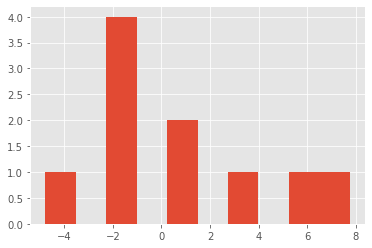

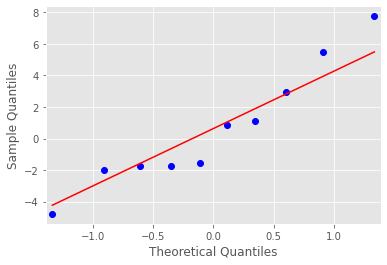

x_50


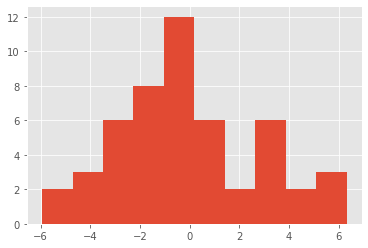

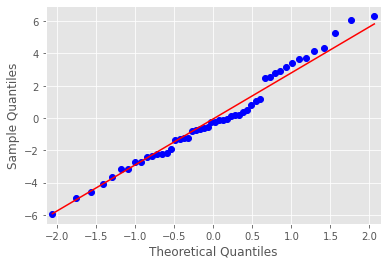

x_100


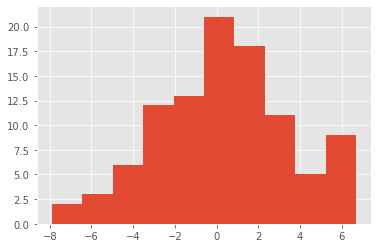

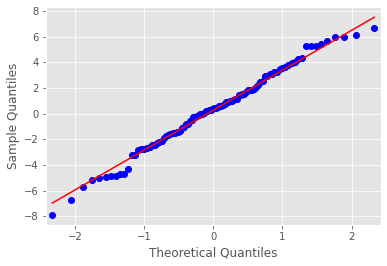

x_1000


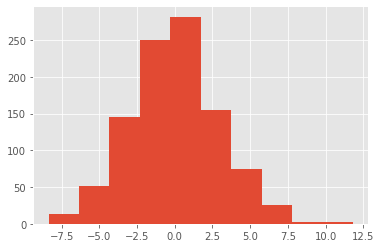

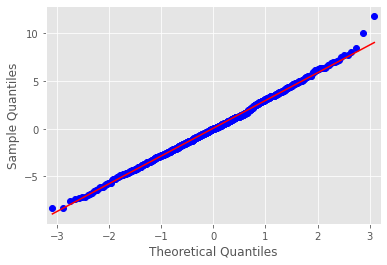

In [12]:
# Plot histograms and Q-Q plots for above datasets
labels = ['x_10','x_50','x_100','x_1000']
for ind, i in enumerate([x_10,x_50,x_100,x_1000]):
    print (labels[ind])
    plt.hist(i)
    sm.qqplot(i, line='s')
    plt.show();


In [13]:
# Your comments here 
# Histograms should not be used solely to detect normality directly
# Histograms are better to look for symmetry, skewness, and outliers 
# These can instead be used to get an indications of non-normality. 

# We see some outliers in our datasets
# no clear indications of non-normality for each plot.

In [14]:
# The Q-Q plot is a much better visualization of data as gives a reference to compare against  
# Shows a better picture about normality instead of relying on the histograms (or box plots).
# From Q-Q plot we can be more assured our data is normal - compared to non normality check in histogram

### Create a function to plot the normal CDF and ECDF for a given dataset
- Create a function to generate an empirical CDF from data
- Create a normal CDF using the same mean = 0 and sd = 3, having the same number of values as data

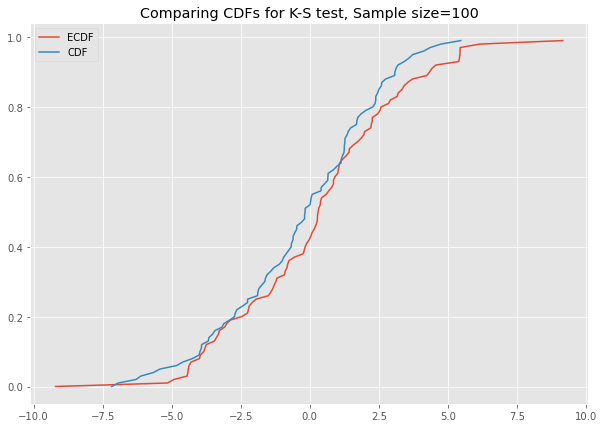

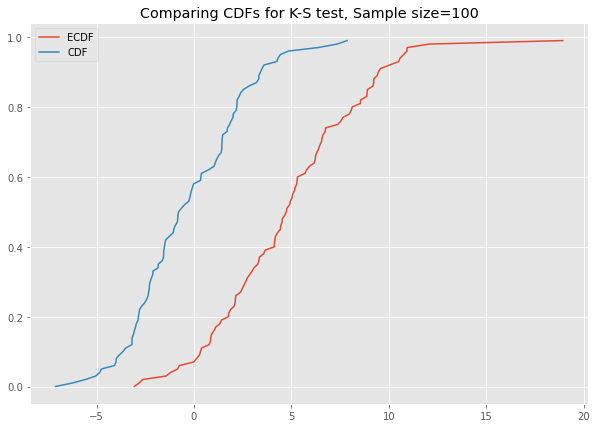

In [15]:
# You code here 

def ks_plot(data):

    plt.figure(figsize=(10, 7))
    plt.plot(np.sort(data), np.linspace(0, 1, len(data), endpoint=False))
    plt.plot(np.sort(stats.norm.rvs(loc=0, scale=3, size=len(data))), np.linspace(0, 1, len(data), endpoint=False))

    plt.legend(['ECDF', 'CDF'])
    plt.title('Comparing CDFs for K-S test, Sample size=' + str(len(data)))
    

ks_plot(stats.norm.rvs(loc=0, scale=3, size=100)) 
ks_plot(stats.norm.rvs(loc=5, scale=4, size=100))

This is awesome. The difference between the two CDFs in the second plot shows that the sample did not come from the distribution which we tried to compare it against. 

Now you can run all the generated datasets through the function `ks_plot()` and comment on the output.

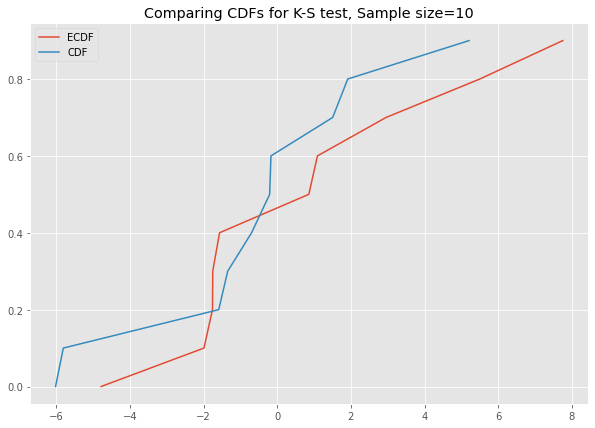

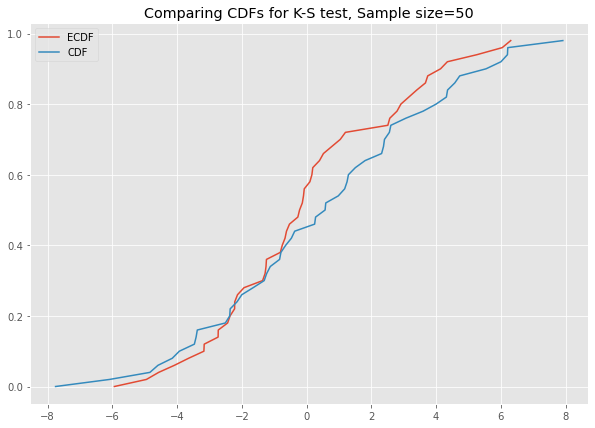

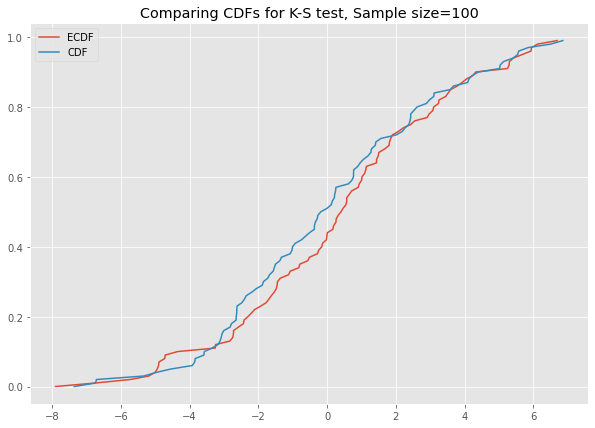

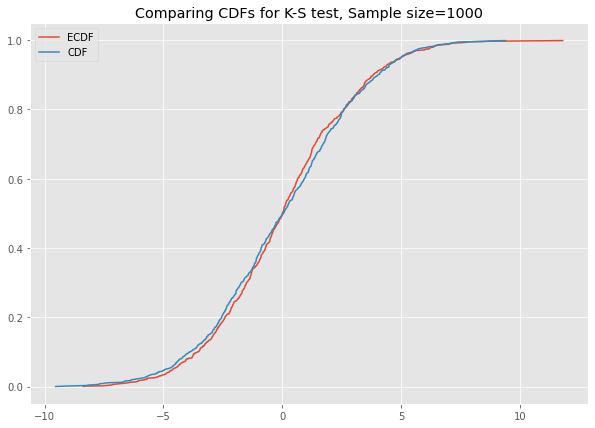

In [16]:
# Your code here 
ks_plot(x_10)
ks_plot(x_50)
ks_plot(x_100)
ks_plot(x_1000)

In [17]:
# Your comments here 

# As we have more data values to compare, we get a better idea of normality
# Due to randomness in smaller sample sizes, it is very likely that the value of d would be high
# As our sample size goes from 50 to a 1000, we are in a much better position to comment on normality

### K-S test in SciPy

Let's run the Kolmogorov-Smirnov test, and use some statistics to get a final verdict on normality. We will test the hypothesis that the sample is a part of the standard t-distribution. In SciPy, we run this test using the function below:

```python
scipy.stats.kstest(rvs, cdf, args=(), N=20, alternative='two-sided', mode='approx')
```
Details on arguments being passed in can be viewed at this [link to the official doc.](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html)

Run the K-S test for normality assumption using the datasets created earlier and comment on the output: 
- Perform the K-S test against a normal distribution with mean = 0 and sd = 3
- If p < .05 we can reject the null hypothesis and conclude our sample distribution is not identical to a normal distribution 

In [19]:
# Perform K-S test 

# Your code here 
np.random.seed(999)
for i in [x_10, x_50, x_100, x_1000]:
    print (stats.kstest(i, 'norm', args=(0, 3)))

# KstestResult(statistic=0.1377823669421559, pvalue=0.9913389045954595)
# KstestResult(statistic=0.13970573965633104, pvalue=0.2587483380087914)
# KstestResult(statistic=0.0901015276393986, pvalue=0.37158535281797134)
# KstestResult(statistic=0.030748345486274697, pvalue=0.29574612286614443)

KstestResult(statistic=0.19902562573103844, pvalue=0.7537198628537765)
KstestResult(statistic=0.11465448895597485, pvalue=0.4911961960225214)
KstestResult(statistic=0.08263265277135595, pvalue=0.47684669130401947)
KstestResult(statistic=0.02703879068976378, pvalue=0.44986380667603476)


In [20]:
# Your comments here 

# The P-value in all cases is much greater than .05 
# We cannot reject the Null Hypothesis i.e. our sample is IDENTICAL to a normal distribution
# This is very intuitive as we started off with normal distributions

Generate a uniform distribution and plot / calculate the K-S test against a uniform as well as a normal distribution: 

In [21]:
x_uni = np.random.rand(1000)
# Try with a uniform distubtion
print(stats.kstest(x_uni, lambda x: x))
print(stats.kstest(x_uni, 'norm', args=(0, 3)))

# KstestResult(statistic=0.023778383763166322, pvalue=0.6239045200710681)
# KstestResult(statistic=0.5000553288071681, pvalue=0.0)

KstestResult(statistic=0.022666444380263384, pvalue=0.6744225893674929)
KstestResult(statistic=0.5000726911533943, pvalue=9.01866500220475e-232)


In [22]:
# Your comments here 

# In the first case, the p-value is much larger than 0.05 so we cannot reject the Null Hypothesis 
# and conclude that our sample is a uniform distribution
# In the second case, comparing a uniform distribution against a normal CDF, the p value - 0 
# so we reject the Null Hypothesis with a high degree of confidence 

## Two-sample K-S test

A two-sample K-S test is available in SciPy using following function: 

```python 
scipy.stats.ks_2samp(data1, data2)[source]
```

Let's generate some bi-modal data first for this test: 

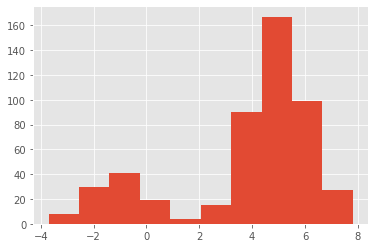

In [25]:
# Generate binomial data
N = 1000
x_1000_bi = np.concatenate((np.random.normal(-1, 1, int(0.1 * N)), np.random.normal(5, 1, int(0.4 * N))))[:, np.newaxis]
plt.hist(x_1000_bi);

Plot the CDFs for `x_1000_bimodal` and `x_1000` and comment on the output. 

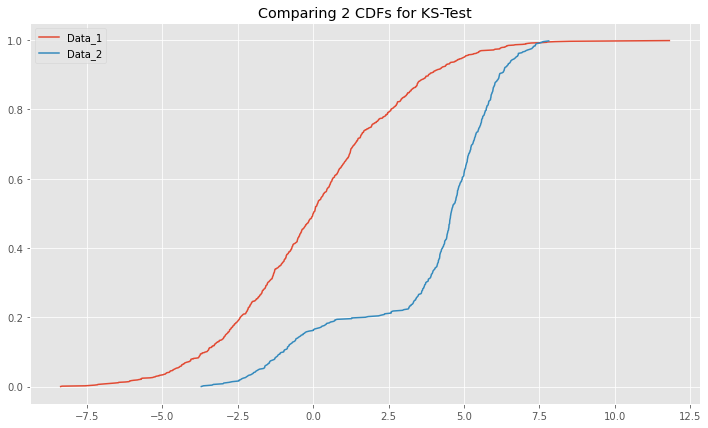

In [26]:
# Plot the CDFs
def ks_plot_2sample(data_1, data_2):
    '''
    Data entered must be the same size.
    '''
    length = len(data_1)
    plt.figure(figsize=(12, 7))
    plt.plot(np.sort(data_1), np.linspace(0, 1, len(data_1), endpoint=False))
    plt.plot(np.sort(data_2), np.linspace(0, 1, len(data_2), endpoint=False))
    plt.legend('top right')
    plt.legend(['Data_1', 'Data_2'])
    plt.title('Comparing 2 CDFs for KS-Test')
    
ks_plot_2sample(x_1000, x_1000_bi[:,0])


In [27]:
# You comments here 

# x_1000 and x_1000_bi diverge a lot 
# We can expect a high value for the d statistic 

Run the two-sample K-S test on `x_1000` and `x_1000_bi` and comment on the results. 

In [28]:
# Check if the distributions are equal
stats.ks_2samp(x_1000, x_1000_bi[:,0])

# Ks_2sampResult(statistic=0.633, pvalue=4.814801487740621e-118)

KstestResult(statistic=0.625, pvalue=1.7763568394002505e-15)

In [29]:
# Your comments here 

# A very small p-value, hence we reject the Null hypothesis
# The two samples belog to different distributions

## Summary

In this lesson, we saw how to check for normality (and other distributions) using one- and two-sample K-S tests. You are encouraged to use this test for all the upcoming algorithms and techniques that require a normality assumption. We saw that we can actually make assumptions for different distributions by providing the correct CDF function into Scipy K-S test functions. 